# Linear Regression

In the linear regression part of this assignment, we have a small dataset available to us. We won't have examples to spare for validation set, instead we'll use cross-validation to tune hyperparameters.

### Assignment Goals:
In this assignment, we will:
* implement linear regression
    * use gradient descent for optimization
    * implement regularization techniques
        * $l_1$/$l_2$ regularization
        * use cross-validation to find a good regularization parameter $\lambda$
        
### Note:

You are not required to follow this exact template. You can change what parameters your functions take or partition the tasks across functions differently. However, make sure there are outputs and implementation for items listed in the rubric for each task. Also, indicate in code with comments which task you are attempting.

# GRADING

You will be graded on parts that are marked with **\#TODO** comments. Read the comments in the code to make sure you don't miss any.

### Mandatory for 478 & 878:

|   | Tasks                      | 478 | 878 |
|---|----------------------------|-----|-----|
| 1 | Implement `kfold`          | 20  |  20 |
| 2 | Implement `mse`            |  10  |  10  |
| 3 | Implement `fit` method     | 40  | 40  |
| 4 | Implement `predict` method | 20  | 20  |
| 5 | Implement `regularization` | 20  | 10   |

### Bonus for 478 & 878
|   | Tasks                      | 478 | 878 |
|---|----------------------------|-----|-----|
| 3 | `fit` (learning rate)       | 10  | 10  |
| 6 | Polynomial regression      | 10   | 5   |
| 7 | Grid search                | 10  | 5  |

Points are broken down further below in Rubric sections. The **first** score is for 478, the **second** is for 878 students. There are a total of 140 points in this part of assignment 2 for 478 and 120 points for 878 students.

You can use numpy for array operations and matplotlib for plotting for this assignment. Please do not add other libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Following code makes the Model class and relevant functions available from "model.ipynb".

In [2]:
%run model.ipynb

The target value (house prices in $1,000) is plotted against feature values below.

There are 506 examples with 13 features.


Text(0.06,0.5,'House Value in $1000')

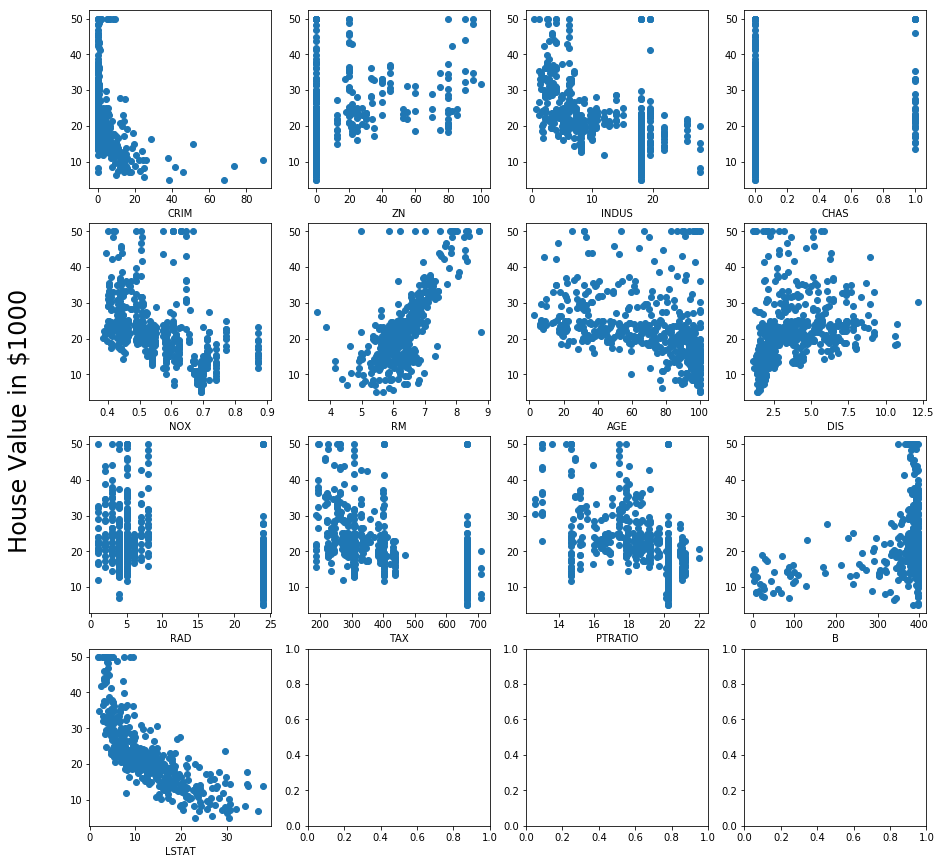

In [3]:
features, feature_names, targets = preprocess('../data/housing.data', '../data/housing.names')
print('There are {} examples with {} features.'.format(features.shape[0], features.shape[1]))

%matplotlib inline
fig, axs = plt.subplots(4, 4, figsize=(15, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.2, wspace=.20)

# DISREGARD LAST 3 EMPTY PLOTS
for index, feature_name in enumerate(feature_names):
    
    axs[index//4][index %4].scatter(features[:, index], targets)
    axs[index//4][index %4].set_xlabel(feature_name)

fig.text(0.06, 0.5, 'House Value in $1000', ha='center', va='center', rotation='vertical', size=24)

## TASK 1: Implement `kfold`

Implement "kfold" function for $k$-fold cross-validation in "model.ipynb". 5 and 10 are commonly used values for $k$. You can use either one of them.

### Rubric:
 * No intersection between test and train parts +10, +10
 * No intersection between test folds +10, +10

### Test `kfold`

In [4]:
# Obtain 5 splits of data.
splits = kfold(targets.shape[0], k=5)

# Check that test folds are completely different
# Check that for a given i, train and test are completely different
for i in range(5):
    intersection = set(splits[i][0]).intersection (set(splits[i][1]))
    if intersection:
        print('Test-train splits intersect!')
    for j in range(5):
        if i!=j:
            intersection = set(splits[i][1]).intersection (set(splits[j][1]))
            if intersection:
                print('Test splits intersect!')

## TASK 2: Implement `mse`

We'll  use mean squared error (mse) for linear regression. Next, implement "mse" function in "model.ipynb" that takes predicted and true target values, and returns the "mse" between them.

### Rubric:
 * Correct mse +10, +10

### Test `mse`

In [6]:
mse(np.array([100, 300]), np.array([200, 400]))

5000.0

## TASKS 3, 4, 5: Implement `fit`, `predict`, `regularization`

We can define our linear_regression model class now. Implement the "fit" and "predict" methods.

### Rubric:
* fit without regularization +20, +20
* learning rate interpretation +10, +10 (BONUS for both)
* $l_1$ regularization +10, +5
* $l_2$ regularization +10, +5
* fit works with regularization +20, +20
* predict +20, +20

In [25]:
class Linear_Regression(Model):
        
    # You can disregard regularizer and kwargs for TASK 3
    def fit(self, X, Y, learning_rate =  0.000001, epochs = 2000, regularizer=None,lambd =0,**kwargs):
        '''
        Args: 
            learning_rate: float
                step size for parameter update
            epochs: int
                number of updates that will be performed
            regularizer: str
                one of l1 or l2
            lambd: float
                regularization coefficient
        '''

        # we will need to add a column of 1's for bias
        size = X.shape[0]
        ones = np.ones(size)
        ones = np.reshape(ones, (size ,-1))
        
        features = np.hstack((ones, X))
        X = features
        
        # theta_hat contains the parameters for the model
        # initialize theta_hat as zeros
        # one parameter for each feature and one for bias
        theta_hat = np.zeros(X.shape[1])
        #print(len(theta_hat))
        #print(len(Y))
        # TODO
        #TH = len(ones)/size
        #print(TH)
        # if kwargs is none then assign the value is 0.1
        if lambd == 0: 
            lambd = 0.1
        d = 0 
        testing = 0
        T = 0
        for epoch in range(epochs):
            # compute model predictions for training examples
            y_hat = np.dot(X , theta_hat)

            if regularizer == None:

                # use mse function to find the cost
                cost = mse(y_hat, Y)
                
                # You can use below print statement to monitor cost
                #rint('Current cost is {}'.format(cost))
                # calculate gradients wrt theta
                for i in range (0, len(X)):
                    d += (y_hat[i] - Y[i])*X[i]
                d = (d/len(X))
                grad_theta = theta_hat - (learning_rate * d)
                #print(grad_theta)
                # update theta
                theta_hat = grad_theta
                #raise NotImplementedErrork

            else:
                
                
                # take regularization into account
                # use your regularization function
                # you will need to compute the gradient of the regularization term
                #raise NotImplementedError
                if regularizer == 'l1':
                    for ii in range (0,theta_hat.shape[0]):
                        testing +=  np.abs(theta_hat[ii])
                    testing = testing * ((learning_rate * lambd)/len(X))
                    grad_theta = theta_hat - np.dot(((learning_rate/len(X))*np.matrix.transpose(X)),(np.dot(X,theta_hat)-Y))
                    
                if regularizer == 'l2':
                    testing = (learning_rate * lambd *theta_hat)/len(X)
                    grad_theta = theta_hat - np.dot(((learning_rate/len(X))*np.matrix.transpose(X)),(np.dot(X,theta_hat)-Y))
                theta_hat = grad_theta - testing
        # update the model parameters to be used in predict method
                
            
        self.theta = theta_hat

        
    def predict(self, test_features):
        
        # obtain test features for current fold
        # do not forget to add a column for bias
        # as in fit method

        # TODO
        
        # get predictions from model
       
       
        size_test_features = test_features.shape[0]
        one_predict = np.ones(size_test_features)
        one_predict = np.reshape(one_predict, (size_test_features ,-1))
        
        features_ = np.hstack((one_predict, test_features))
        X_ = features_
        theta_hat_predict = np.zeros(X_.shape[1])
        y_hat = np.dot(features_ , theta_hat_predict)
        #aise NotImplementedError

        return y_hat
        

Initialize and fit the model. During training monitor your cost function. Experiment with different learning rates. Insert a cell below and summarize and briefly interpret your observations.

In [26]:
# initialize and fit the model
my_model = Linear_Regression()
# change lr to try different learning rates
#0.0001
lr = 0.000001
my_model.fit(features[splits[0][0]], targets[splits[0][0]], learning_rate = lr)

14
406


Define "regularization" function which implements $l_1$ and $l_2$ regularization in "model.ipynb".

In [27]:
weights = list(np.arange(0, 1.1 , 0.1))
for method in ['l1', 'l2']:
    print(regularization(weights, method=method))

5.5
3.85


## TASK 6: Polynomial Regression

Do you think the dataset would benefit from polynomial regression? Please briefly explain why or why not.

### Rubric:
* Sound reasoning +10, +5

## TASK 7: Grid Search

Using cross-validation, try different values of $\lambda$ for $l_1$ and $l_2$ regularization to find good $\lambda$ values that result in low average _mse_.

### Rubric:
* Different methods are tried with different values of $\lambda$ +10, +5

### Test: Grid Search

In [28]:
# initialize the model
my_model = Linear_Regression()

# two regularization methods
for method in ['l1', 'l2']:
    # different lambda
    for lmbd in np.arange(0, 1, 0.1):
        
        k_fold_mse = 0
        fit_kwargs={'method': method}
        
        for k in range(5):
            
            # fit on training
            my_model.fit(features[splits[k][0]], targets[splits[k][0]], lambd = lmbd, regularizer = method )
            # predict test
            pred = my_model.predict(features[splits[k][1]])
            k_fold_mse += mse(pred,targets[splits[k][1]])
        print(k_fold_mse/5)

14
406
14
406
14
406
14
406
14
406
5.9444232
14
406
14
406
14
406
14
406
14
406
5.9444232
14
406
14
406
14
406
14
406
14
406
5.9444232
14
406
14
406
14
406
14
406
14
406
5.9444232
14
406
14
406
14
406
14
406
14
406
5.9444232
14
406
14
406
14
406
14
406
14
406
5.9444232
14
406
14
406
14
406
14
406
14
406
5.9444232
14
406
14
406
14
406
14
406
14
406
5.9444232
14
406
14
406
14
406
14
406
14
406
5.9444232
14
406
14
406
14
406
14
406
14
406
5.9444232
14
406
14
406
14
406
14
406
14
406
5.9444232
14
406
14
406
14
406
14
406
14
406
5.9444232
14
406
14
406
14
406
14
406
14
406
5.9444232
14
406
14
406
14
406
14
406
14
406
5.9444232
14
406
14
406
14
406
14
406
14
406
5.9444232
14
406
14
406
14
406
14
406
14
406
5.9444232
14
406
14
406
14
406
14
406
14
406
5.9444232
14
406
14
406
14
406
14
406
14
406
5.9444232
14
406
14
406
14
406
14
406
14
406
5.9444232
14
406
14
406
14
406
14
406
14
406
5.9444232
